<a href="https://colab.research.google.com/github/zerroukines/MedicalInsuranceCostsUsingLR/blob/main/MedicalInsuranceCostsUsingLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Medical Insurance Costs: A Linear Regression Analysis**

**Dataset source:** https://www.kaggle.com/datasets/mirichoi0218/insurance


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv("/content/insurance.csv")

In [3]:
# Data Preprocessing and Exploration
# Check for missing values
missing_values = data.isnull().sum()

In [4]:
# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=["sex", "smoker", "region"], drop_first=True)

In [5]:
# Explore the dataset
print(data.head())
print(data.describe())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  
               age          bmi     children       charges     sex_male  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025    30.663397     1.094918  13270.422265     0.505232   
std      14.049960     6.098187     1.205493  12

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

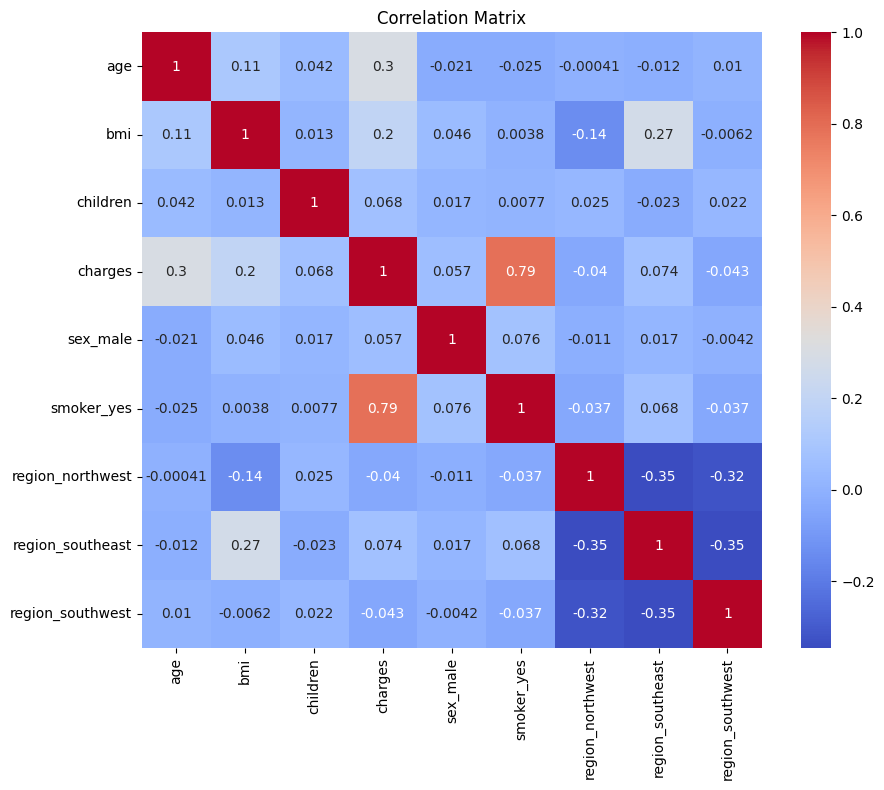

In [7]:
# Visualizations
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

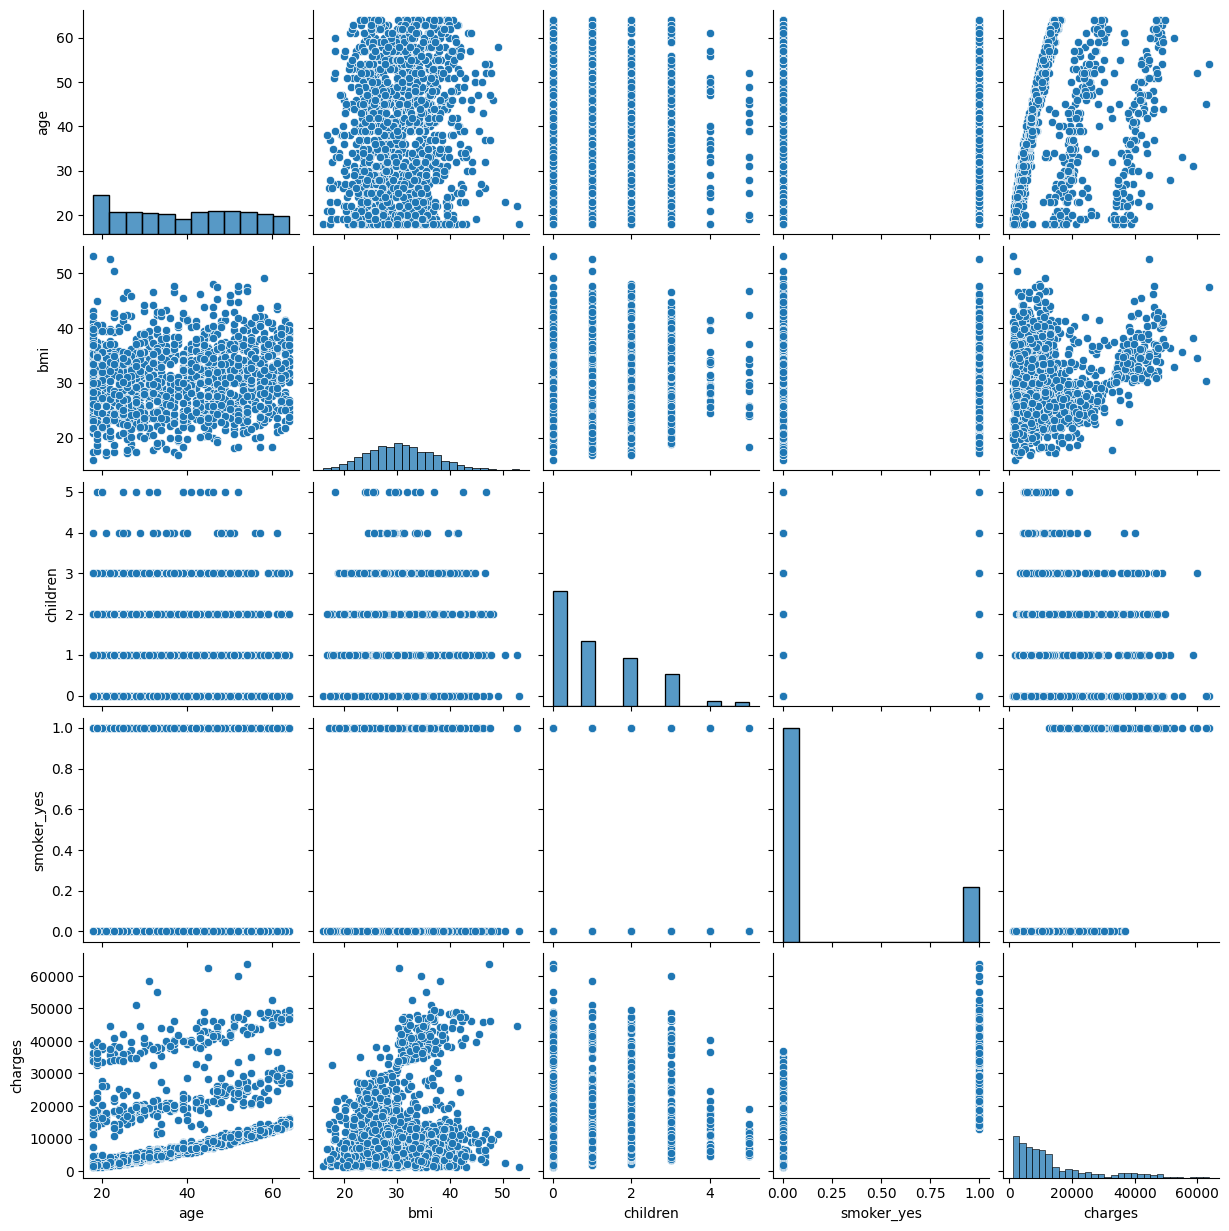

In [8]:
# Pairplot for selected features
selected_features = ["age", "bmi", "children", "smoker_yes", "charges"]
sns.pairplot(data[selected_features])
plt.show()

In [9]:
# Split the data into features (X) and the target variable (y)
X = data.drop(columns=["charges"])
y = data["charges"]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [15]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 33780509.57479164
Root Mean Squared Error: 5812.100272258871
R-squared: 0.7696118054369011


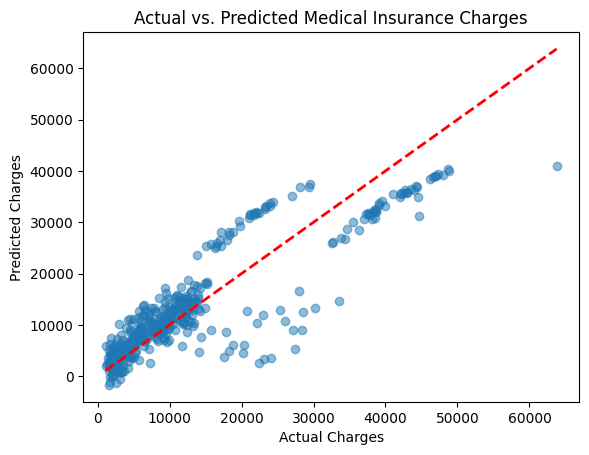

In [16]:
# Visualize the actual vs. predicted charges
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Medical Insurance Charges")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()